# Turtle Rescue Forecast Challenge


* Link:
[Turtle Rescue Forecast Challenge](https://zindi.africa/competitions/turtle-rescue-forecast-challenge/data)

* Objective: The objective of this challenge is to forecast the number of turtles caught per week per capture site. This will help Local Ocean plan their staff schedules and budget.

| Variable             | Description                                                                                                                                               |
|----------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------|
| Rescue_ID            | It’s an individual bycatch incidence identity number. The numbers are consecutive, for each year e.g. 2018_RE_0732 means rescue number 732 in year 2018 | 
| Date_TimeCaught      | Date the turtle is captured e.g. 06/01/ |2018                                                                                                                |
| Researcher           | Name of bycatch officer(s) involved with specific rescue                                                                                                   |
| Capture Site         | Area where turtle was captured, as reported by the fisher.                                                                                                 |
| Foraging Ground      | General area of ocean area where turtle was captured. The assumption is that the turtle was foraging where it was captured.                               |
| Capture Method       | Fishing gear or method used by fishers to capture the turtle                                                                                               |
| Fisher               | Name of the fisher who captured the turtle                                                                                                                 |
| Landing_Site         | Section of beach where turtle is landed.                                                                                                                  |
| Species              | Species of turtle (e.g. green turtle, hawksbill, loggerhead etc.)                                                                                          |
| Tag_1                | Individual / unique number used to identify a turtle. Each turtle that is captured is tagged.                                                            |
| Tag_2                | Second tag added to large turtles. Turtles with two tags: tag 1 is an odd number e.g. KEL0169 and tag 2 is even and consequent e.g. KEL0170                |
| Lost_Tags            | Replaced tags. If a turtle has outgrown its tag, the tag is removed and replaced with a bigger one, with a different number                              |
| T_Number             | It a number given to a turtle that has been taken to the rehabilitation facility (TRC) for treatment.                                                    |
| CCL_cm               | Central Carapace Length (Biometric measurement). Measured in centimetres                                                                                  |
| CCW_cm               | Central Carapace Width (Biometric measurement). Measured in centimetres                                                                                    |
| Weight_Kg            | (Biometric measurement). Measured in Kgs                                                                                                                   |
| Sex                  | Gender of the turtle.                                                                                                                                     |
| Turtle Characteristics | Description of turtles (mostly unusual occurrences e.g. disease, injury, parasites etc. Usually as short textual description                               |
| Status               | Indicates whether the turtle is released or admitted to TRC                                                                                                |
| Release Site         | Site where the turtle is released                                                                                                                          |
| Date_Release         | Date turtle is released                                                                                                                                    |
| Release_Admiss_Notes | Additional information about release                                                                                                                      |
| SpecialRemarks       | Additional info (General) about turtle                                                                                                                     |


Actions to take:

Date_TimeRelease: we don't need it, because it is not relevant to our target, too many missing values

datetime_caught
datetime_release
capturesite
foraging
landing site
capture number- target variable(?)
rescue id

 0   Rescue_ID              18062 non-null  object  nonnumerical, probably we won't use it, 
 1   Date_TimeCaught        18062 non-null  object  date time, we will use it, changed to date format, no missing values, skewed to the right, (done)
 2   Researcher             18062 non-null  object  nonnumerical, inbalecd more researcher 20, probably we don't need it, 
 3   CaptureSite            18062 non-null  object  categorical, inbalanced, high correlation, much more from 'other values', probably drop 'other values', normalize
 4   ForagingGround         18062 non-null  object  categorical, high correlation, inbalanced, much more from Creek, normalize
 5   CaptureMethod          18062 non-null  object  categorical, inbalanced, much more from 'net', probably we don't need it
 6   Fisher                 18062 non-null  object  categorical, probably we don't need it
 7   LandingSite            18062 non-null  object  categorical, high correlation,  much more of '8469', inbalanced 
 8   Species                18062 non-null  object  categorical, inbalanced, more of 5, probably we don't need it
 9   Tag_1                  17937 non-null  object  nonnumerical, don't need
 10  Tag_2                  4911 non-null   object  categorical, missing values, 
 11  Lost_Tags              925 non-null    object  nonnumerical, missing values (?), 
 12  T_Number               38 non-null     object  
 13  CCL_cm                 18038 non-null  float64
 14  CCW_cm                 18035 non-null  float64
 15  Weight_Kg              12653 non-null  float64
 16  Sex                    13732 non-null  object 
 17  TurtleCharacteristics  18010 non-null  object 
 18  Status                 14429 non-null  object 
 19  ReleaseSite            17987 non-null  object 
 20  Date_TimeRelease       11954 non-null  object

## Set-up and Import

Terminal: 
'make setup'

In [6]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from ydata_profiling import ProfileReport

import missingno as msno



In [7]:
#! pip install ydata-profiling --upgrade

In [8]:
# Turtles dataset - CaptureSite_category.csv
df_capturesite_category = pd.read_csv('./data/CaptureSite_category.csv')
df_capturesite_category.head()

,CaptureSite,CaptureSiteCategory,Type
0,CaptureSite_0,CaptureSiteCategory_2,Type_1
1,CaptureSite_1,CaptureSiteCategory_2,Type_1
2,CaptureSite_10,CaptureSiteCategory_2,Type_1
3,CaptureSite_11,CaptureSiteCategory_0,Type_0
4,CaptureSite_12,CaptureSiteCategory_2,Type_1


In [9]:
# Different categories of CaptureSite
df_capturesite_category['CaptureSite'].unique()


array(['CaptureSite_0', 'CaptureSite_1', 'CaptureSite_10',
       'CaptureSite_11', 'CaptureSite_12', 'CaptureSite_13',
       'CaptureSite_14', 'CaptureSite_15', 'CaptureSite_16',
       'CaptureSite_17', 'CaptureSite_18', 'CaptureSite_19',
       'CaptureSite_2', 'CaptureSite_20', 'CaptureSite_21',
       'CaptureSite_22', 'CaptureSite_23', 'CaptureSite_24',
       'CaptureSite_25', 'CaptureSite_26', 'CaptureSite_27',
       'CaptureSite_28', 'CaptureSite_3', 'CaptureSite_4',
       'CaptureSite_5', 'CaptureSite_6', 'CaptureSite_7', 'CaptureSite_8',
       'CaptureSite_9'], dtype=object)

In [10]:
print('Classification of CaptureSite categories: ', len(df_capturesite_category['CaptureSite'].unique()))


Classification of CaptureSite categories:  29


In [11]:
df_capturesite_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CaptureSite          29 non-null     object
 1   CaptureSiteCategory  29 non-null     object
 2   Type                 29 non-null     object
dtypes: object(3)
memory usage: 828.0+ bytes


In [12]:
# Turtles dataset - Sample_sub.csv
df_sample_sub = pd.read_csv('./data/Sample_sub.csv')
df_sample_sub.head()

,ID,Capture_Number
0,CaptureSite_0_201901,7
1,CaptureSite_0_201902,1
2,CaptureSite_0_201903,5
3,CaptureSite_0_201904,2
4,CaptureSite_0_201905,3


what is capture_number? how many captured turtles?

In [13]:
df_sample_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              1276 non-null   object
 1   Capture_Number  1276 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.1+ KB


In [14]:
# Turtles dataset - train.csv
df_train = pd.read_csv('./data/train.csv')
df_train.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,NaN,NaN,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,NaN,NaN,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,NaN,NaN,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,NaN,NaN,60.50,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,NaN,NaN,34.70,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02


In [15]:
df_train.tail()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease
18057,2018_RE_1511,2018-12-18,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_569,LandingSite_CaptureSiteCategory_1,Species_5,KES1828,...,NaN,NaN,57.13,50.57,21.09,Unknown,White calcareous algae on carapace,Released,ReleaseSite_68,18/12/18
18058,2018_RE_1514,2018-12-18,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_125,LandingSite_CaptureSiteCategory_1,Species_6,KES0563,...,KES0416,NaN,42.07,38.37,9.02,Unknown,Calcareous + green algae on carapace\nBarnacle...,Released,ReleaseSite_68,18/12/18
18059,2018_RE_1532,2018-12-24,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_1343,LandingSite_CaptureSiteCategory_1,Species_5,KES1833,...,NaN,NaN,57.20,52.30,NaN,Unknown,Clean turtle,Released,ReleaseSite_68,24/12/18
18060,2018_RE_1533,2018-12-24,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_1551,LandingSite_CaptureSiteCategory_1,Species_5,KES1831,...,NaN,NaN,51.90,48.50,NaN,Unknown,Green algae on carapace\ntip of left supra mis...,Released,ReleaseSite_68,24/12/18
18061,2018_RE_1550,2018-12-28,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_1551,LandingSite_CaptureSiteCategory_1,Species_6,KES1432,...,NaN,NaN,34.60,31.20,4.29,Unknown,Thick pink patches of calcareous algae on cara...,Released,ReleaseSite_37,28/12/18


In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18062 entries, 0 to 18061
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rescue_ID              18062 non-null  object 
 1   Date_TimeCaught        18062 non-null  object 
 2   Researcher             18062 non-null  object 
 3   CaptureSite            18062 non-null  object 
 4   ForagingGround         18062 non-null  object 
 5   CaptureMethod          18062 non-null  object 
 6   Fisher                 18062 non-null  object 
 7   LandingSite            18062 non-null  object 
 8   Species                18062 non-null  object 
 9   Tag_1                  17937 non-null  object 
 10  Tag_2                  4911 non-null   object 
 11  Lost_Tags              925 non-null    object 
 12  T_Number               38 non-null     object 
 13  CCL_cm                 18038 non-null  float64
 14  CCW_cm                 18035 non-null  float64
 15  We

## Preprocessing

<Axes: >

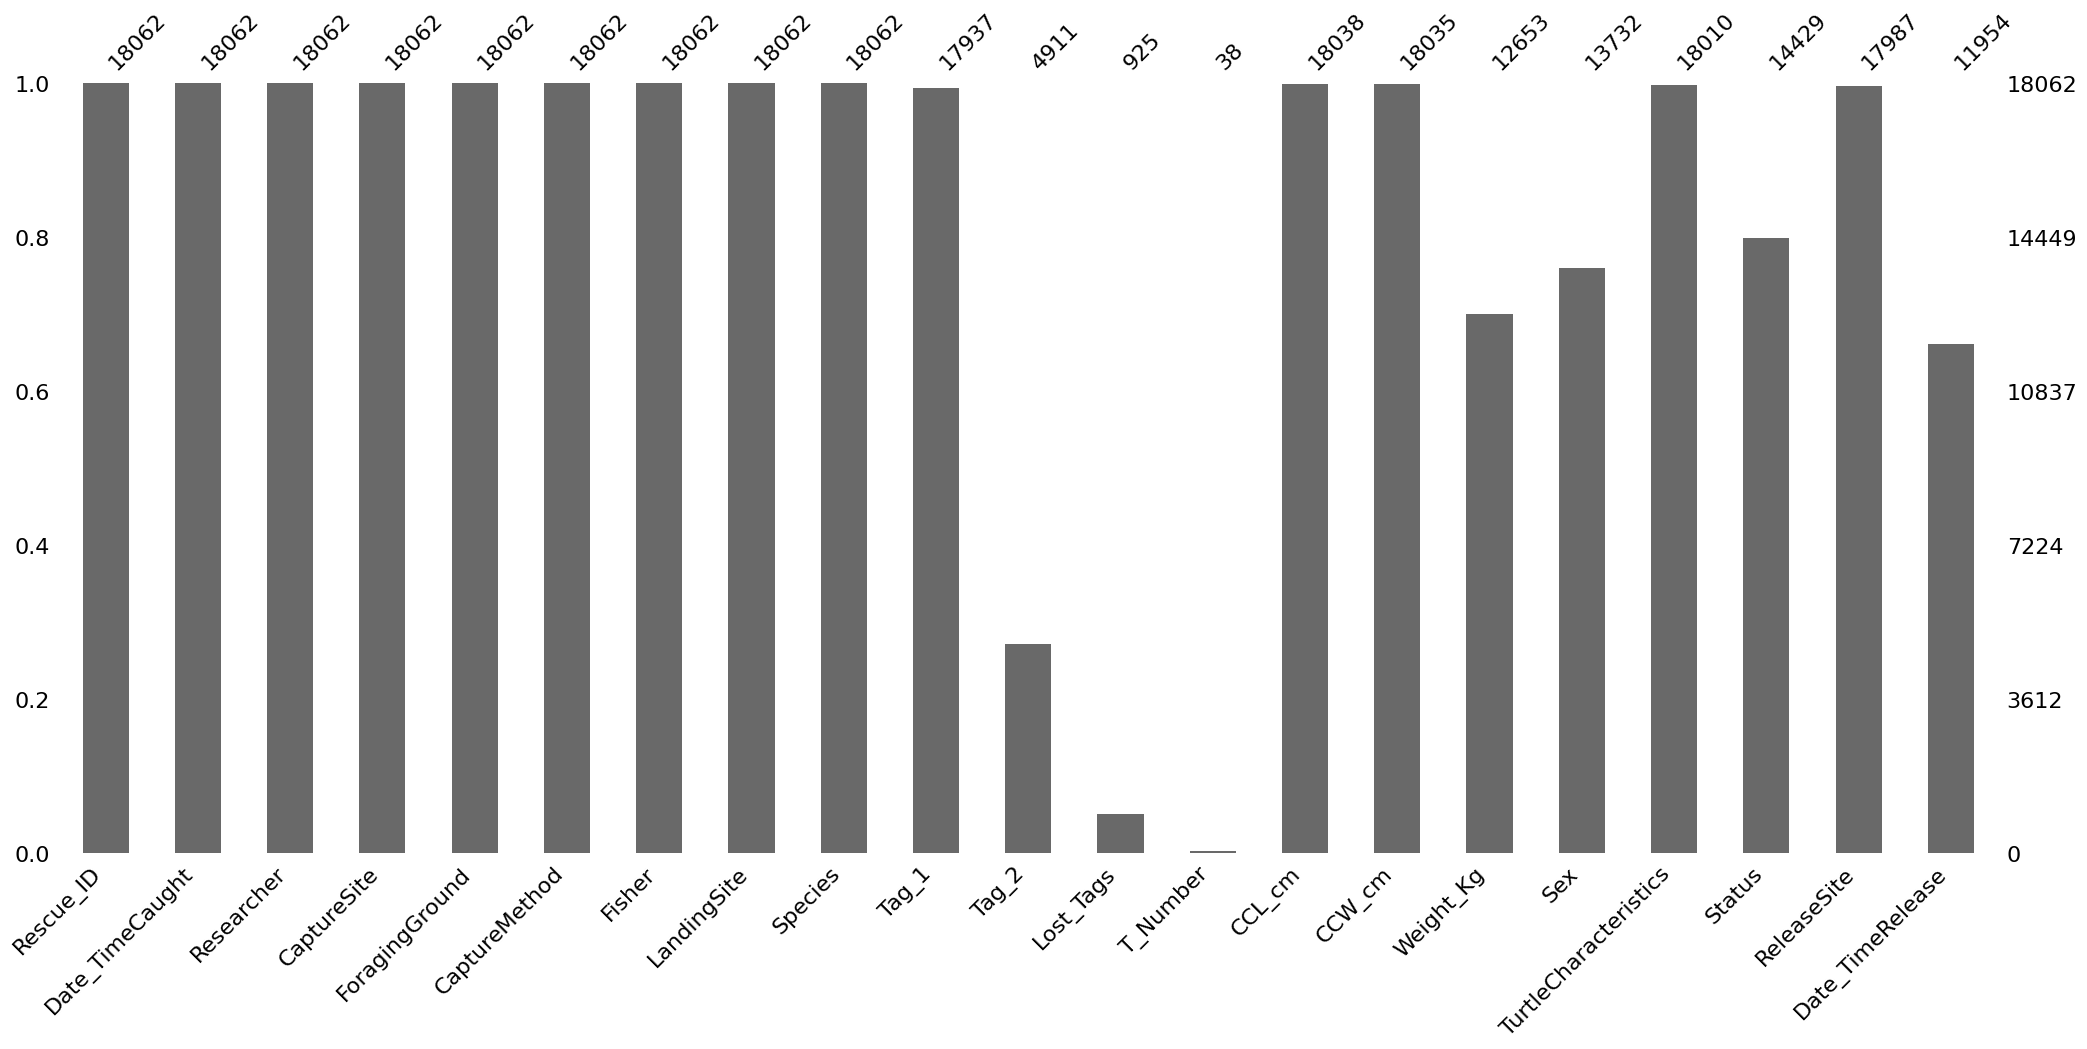

In [17]:
# plotting percentage of missing values per column
msno.bar(df_train)

<Axes: >

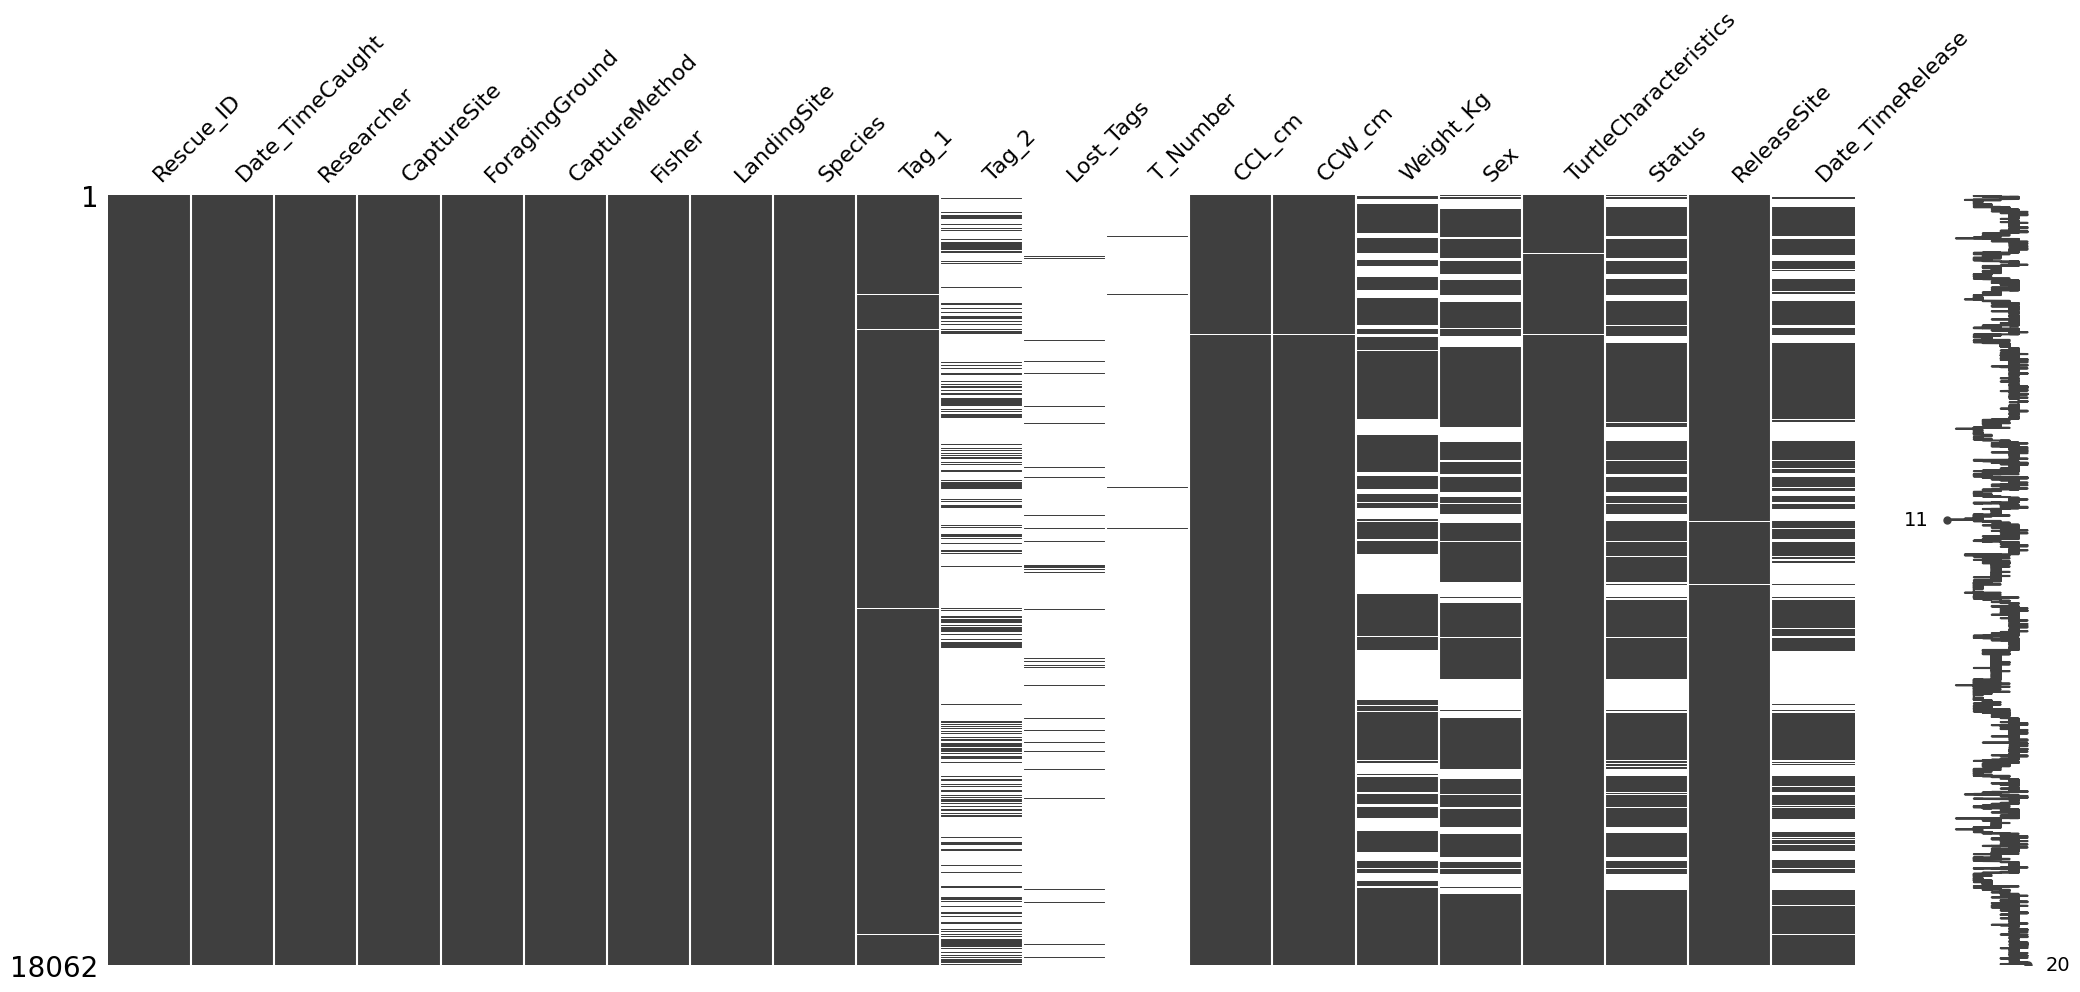

In [18]:
msno.matrix(df_train)

In [19]:
# Transform 'Date_TimeRelease' column to datetime format
df_train_date = df_train.copy()

# Transform 'Date_TimeRelease' column to string format
df_train_date['Date_TimeRelease'] = df_train_date['Date_TimeRelease'].astype(str)

# Replace / on date columns 
df_train_date['Date_TimeRelease'] = df_train_date['Date_TimeRelease'].str.replace('/', '-')

# Add '20' in years 

for i in range(len(df_train_date['Date_TimeRelease'])):
    d = df_train_date['Date_TimeRelease'][i]
    df_train_date['Date_TimeRelease'][i] = df_train_date['Date_TimeRelease'][i].replace(d, '20'+d)
 

df_train_date['Date_TimeRelease'].head(30)


0           2022-12-00
1           2028-10-01
2           2001-11-01
3           2011-03-02
4           2008-08-02
5           2010-08-02
6           2021-10-02
7           2021-10-02
8           2022-10-02
9                20nan
10    20ReleaseSite_50
11               20nan
12               20nan
13          20Released
14    20ReleaseSite_50
15    20ReleaseSite_62
16               20nan
17               20nan
18               20nan
19               20nan
20               20nan
21               20nan
22               20nan
23               20nan
24               20nan
25               20nan
26               20nan
27               20nan
28               20nan
29               20nan
Name: Date_TimeRelease, dtype: object

In [20]:
# Transform 'Date_TimeCaught' column to datetime format
df_train_date['Date_TimeCaught'] = pd.to_datetime(df_train_date['Date_TimeCaught'])

In [21]:
# Date_TimeRelease column to datetime format -  we have too many missing values. 
#df_train_date['Date_TimeRelease'] = pd.to_datetime(df_train_date['Date_TimeRelease'])

In [22]:
# make a profile report of all data
#profile = ProfileReport(df_train, minimal=False)
#profile.to_file("./data/output.html")

## Checking missing values

In [23]:
df_train_date.isna().sum()

Rescue_ID                    0
Date_TimeCaught              0
Researcher                   0
CaptureSite                  0
ForagingGround               0
CaptureMethod                0
Fisher                       0
LandingSite                  0
Species                      0
Tag_1                      125
Tag_2                    13151
Lost_Tags                17137
T_Number                 18024
CCL_cm                      24
CCW_cm                      27
Weight_Kg                 5409
Sex                       4330
TurtleCharacteristics       52
Status                    3633
ReleaseSite                 75
Date_TimeRelease             0
dtype: int64

In [27]:
# Check for duplicates
df_train_date.duplicated().any(), df_capturesite_category.duplicated().any()

(False, False)

In [26]:
#
#df = pd.concat([df_train_date.Date_TimeCaught, df_train_date.CaptureSite, df_train_date.ForagingGround, df_train_date.LandingSite, df_train_date.Status,  
                df_capturesite_category,
                df_sample_sub], axis=1)
#df.head()

,Date_TimeCaught,CaptureSite,CaptureSiteCategory,Type
0,2000-12-22,CaptureSite_0,CaptureSiteCategory_2,Type_1
1,2001-10-28,CaptureSite_1,CaptureSiteCategory_2,Type_1
2,2001-11-01,CaptureSite_10,CaptureSiteCategory_2,Type_1
3,2002-03-11,CaptureSite_11,CaptureSiteCategory_0,Type_0
4,2002-08-08,CaptureSite_12,CaptureSiteCategory_2,Type_1


---

In [24]:
coffee_quality.head()

NameError: name 'coffee_quality' is not defined

In [ ]:
Y = coffee_quality["quality_score"]

# Data cleaningin and feature engineering

In [ ]:
coffee_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             28 non-null     int64  
 1   Species                28 non-null     object 
 2   Owner                  28 non-null     object 
 3   Country.of.Origin      28 non-null     object 
 4   Farm.Name              25 non-null     object 
 5   Lot.Number             6 non-null      object 
 6   Mill                   20 non-null     object 
 7   ICO.Number             17 non-null     object 
 8   Company                28 non-null     object 
 9   Altitude               25 non-null     object 
 10  Region                 26 non-null     object 
 11  Producer               26 non-null     object 
 12  Number.of.Bags         28 non-null     int64  
 13  Bag.Weight             28 non-null     object 
 14  In.Country.Partner     28 non-null     object 
 15  Harvest.

In [ ]:
#for this exercise we will only deal with numeric variables

X = coffee_features.select_dtypes(['number'])

## Splitting data for testing 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [ ]:
#dropping Quakers column and unnamed
#changing one of the altitude to log and droping the original
X_train["altitude_mean_log"] = np.log(X_train["altitude_mean_meters"])
X_train.drop(['altitude_mean_meters'], axis=1, inplace=True)
X_train.drop(['Quakers'], axis=1, inplace=True)
X_train.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 17 to 6
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Number.of.Bags        22 non-null     int64  
 1   Harvest.Year          22 non-null     int64  
 2   Fragrance...Aroma     22 non-null     float64
 3   Flavor                22 non-null     float64
 4   Aftertaste            22 non-null     float64
 5   Salt...Acid           22 non-null     float64
 6   Bitter...Sweet        22 non-null     float64
 7   Mouthfeel             22 non-null     float64
 8   Uniform.Cup           22 non-null     float64
 9   Clean.Cup             22 non-null     float64
 10  Balance               22 non-null     float64
 11  Cupper.Points         22 non-null     float64
 12  Total.Cup.Points      22 non-null     float64
 13  Moisture              22 non-null     float64
 14  Category.One.Defects  22 non-null     int64  
 15  Category.Two.Defects  22 

In [ ]:
altitude_low_meters_mean = X_train["altitude_low_meters"].mean()
altitude_high_meters_mean = X_train["altitude_high_meters"].mean()
altitude_mean_log_mean = X_train["altitude_mean_log"].mean()

In [ ]:
# fillna with mean.. 
X_train["altitude_low_meters"] = X_train["altitude_low_meters"].fillna(altitude_low_meters_mean)
X_train["altitude_high_meters"] = X_train["altitude_high_meters"].fillna(altitude_high_meters_mean)
X_train["altitude_mean_log"] = X_train["altitude_mean_log"].fillna(altitude_mean_log_mean)

In [ ]:
print(f"altitude low meters mean is {altitude_low_meters_mean}")
print(f"altitude_high_meters_mean is {altitude_high_meters_mean}")
print(f"altitude_mean_log_mean is {altitude_mean_log_mean}")

altitude low meters mean is 1500.3684210526317
altitude_high_meters_mean is 1505.6315789473683
altitude_mean_log_mean is 7.0571530664031155


## Trainining the model

In [ ]:
## in order to exemplify how the predict will work.. we will save the y_train
X_test.to_csv("data/X_test.csv")
y_test.to_csv("data/y_test.csv")

In [ ]:
#training the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error
y_train_pred = reg.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
print(mse)

6.701014816713759e-28


In [ ]:
#dropping Quakers column and unnamed
#changing one of the altitude to log and droping the original
X_test["altitude_mean_log"] = np.log(X_test["altitude_mean_meters"])
X_test.drop(['altitude_mean_meters'], axis=1, inplace=True)
X_test.drop(['Quakers'], axis=1, inplace=True)
X_test.drop(['Unnamed: 0'], axis=1, inplace=True)
# fillna with mean.. 
X_test["altitude_low_meters"] = X_test["altitude_low_meters"].fillna(altitude_low_meters_mean)
X_test["altitude_high_meters"] = X_test["altitude_high_meters"].fillna(altitude_high_meters_mean)
X_test["altitude_mean_log"] = X_test["altitude_mean_log"].fillna(altitude_mean_log_mean)

In [ ]:
y_test_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print(mse)

2.08680004794465e-27
